In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import pandas as pd

/tmp/ipykernel_3976398/2817862154.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('experiment_results.csv')
df.head()

,dataset,algo,use_contrastive,seed,agent_id,avg_acc,final_acc,forward,backward,catastrophic
0,kmnist,modular,True,seed_0,agent_1,0.833549,0.80820,0.505286,0.026369,-0.295
1,kmnist,modular,True,seed_0,agent_2,0.874713,0.87200,0.500000,0.027333,-0.150
2,kmnist,modular,True,seed_0,agent_6,0.835158,0.80395,0.507357,0.025464,-0.020
3,kmnist,modular,True,seed_0,agent_7,0.864278,0.86955,0.505286,0.025726,-0.360
4,kmnist,modular,True,seed_0,agent_4,0.854416,0.85325,0.495214,0.025893,0.095


In [3]:
m = df.groupby(["algo", "dataset", "use_contrastive"])[
      "final_acc"].mean()
stderr = df.groupby(["algo", "dataset", "use_contrastive"])["final_acc"].sem()
m

algo        dataset       use_contrastive
modular     cifar100      False              0.787837
                          True               0.767437
            fashionmnist  False              0.930831
                          True               0.936975
            kmnist        False              0.818556
                          True               0.844725
            mnist         False              0.946232
                          True               0.956240
monolithic  cifar100      False              0.587488
                          True               0.578813
            fashionmnist  False              0.921381
                          True               0.927769
            kmnist        False              0.790094
                          True               0.833406
            mnist         False              0.903315
                          True               0.947683
Name: final_acc, dtype: float64

In [4]:
stderr

algo        dataset       use_contrastive
modular     cifar100      False              0.003472
                          True               0.004915
            fashionmnist  False              0.006547
                          True               0.005296
            kmnist        False              0.009510
                          True               0.011355
            mnist         False              0.004199
                          True               0.003525
monolithic  cifar100      False              0.002302
                          True               0.004632
            fashionmnist  False              0.006069
                          True               0.006050
            kmnist        False              0.011886
                          True               0.008550
            mnist         False              0.007786
                          True               0.004232
Name: final_acc, dtype: float64

In [5]:
# modular_means when algo == "modular" and use_contrastive == False
# datasets = ['mnist', 'fashionmnist', 'kmnist', 'cifar100']
datasets = ['cifar100']

modular_means = [m[('modular', dataset, False)] for dataset in datasets]
modular_stderr = [stderr[('modular', dataset, False)] for dataset in datasets]

modular_contrastive_means = [m[('modular', dataset, True)] for dataset in datasets]
modular_contrastive_stderr = [stderr[('modular', dataset, True)] for dataset in datasets]

monolithic_means = [m[('monolithic', dataset, False)] for dataset in datasets]
monolithic_stderr = [stderr[('monolithic', dataset, False)] for dataset in datasets]

monolithic_contrastive_means = [m[('monolithic', dataset, True)] for dataset in datasets]
monolithic_contrastive_stderr = [stderr[('monolithic', dataset, True)] for dataset in datasets]

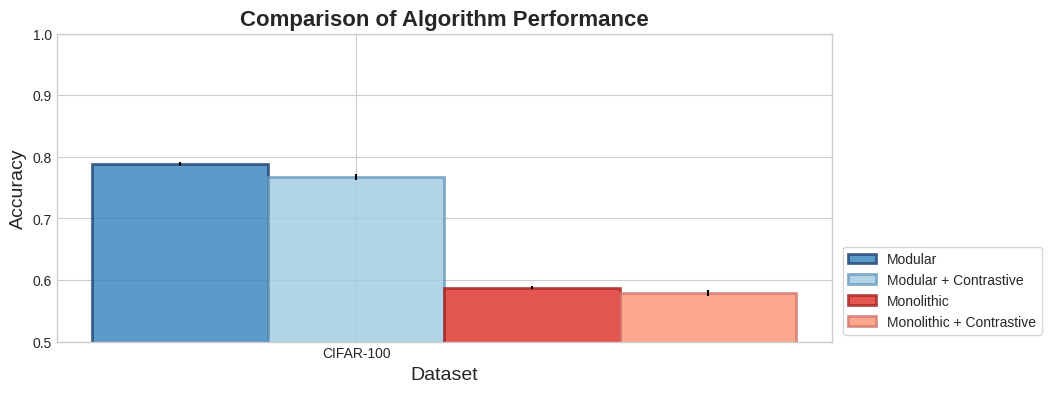

In [6]:


# Set colors
modular_color = '#3182bd'
modular_contrastive_color = '#9ecae1'
monolithic_color = '#de2d26'
monolithic_contrastive_color = '#fc9272'

# Set figure size
fig, ax = plt.subplots(figsize=(10,4))

# Plot data
bar_width = 0.2
opacity = 0.8

# fake ChatGPT data
# modular_means = [93.5, 90.8, 93.7, 71.3, 91.8, 76.4]
# modular_std = [1.1, 0.8, 0.5, 1.2, 0.5, 1.4]

# actual data
# modular_means = [93.5, 90.8, 93.7, 71.3, 91.8, 76.4]
# modular_std = [1.1, 0.8, 0.5, 1.2, 0.5, 1.4]

# modular_contrastive_means = [94.2, 91.6, 93.9, 74.5, 93.4, 77.5]
# modular_contrastive_std = [0.9, 0.7, 0.6, 1.1, 0.7, 1.1]

# monolithic_means = [92.6, 89.4, 92.7, 68.1, 91.0, 74.8]
# monolithic_std = [0.7, 0.9, 0.6, 1.1, 0.8, 0.9]

# monolithic_contrastive_means = [94.3, 91.7, 94.2, 74.8, 94.0, 79.3]
# monolithic_contrastive_std = [0.8, 0.6, 0.4, 0.8, 0.5, 0.9]

linewidth = 2

rects1 = ax.bar(np.arange(len(modular_means))-bar_width, modular_means, bar_width,
                yerr=modular_stderr, alpha=opacity, color=modular_color, label='Modular',
                edgecolor='#214073',
                 linewidth=linewidth,
              )
rects2 = ax.bar(np.arange(len(modular_contrastive_means)), modular_contrastive_means, bar_width,
                yerr=modular_contrastive_stderr, alpha=opacity, color=modular_contrastive_color, label='Modular + Contrastive',
                edgecolor='#6a9bbd',
                 linewidth=linewidth,
                )
rects3 = ax.bar(np.arange(len(monolithic_means))+bar_width, monolithic_means, bar_width,
                yerr=monolithic_stderr, alpha=opacity, color=monolithic_color, label='Monolithic',
                edgecolor='#a6221f',
                                linewidth=linewidth,)
rects4 = ax.bar(np.arange(len(monolithic_contrastive_means))+bar_width*2, monolithic_contrastive_means, bar_width,
                yerr=monolithic_contrastive_stderr, alpha=opacity, color=monolithic_contrastive_color, label='Monolithic + Contrastive',
                 edgecolor='#d4756d',
                 linewidth=linewidth,
                 )


# datasets = ['MNIST', 'FashionMNIST', 'KMNIST', 'CIFAR-100']
datasets = ['CIFAR-100']
# datasets = ['MNIST', 'FashionMNIST', 'KMNIST', 'CIFAR-100', 'Gridworld', 'Composuite']
x = np.arange(len(datasets))
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.set_ylim([0.5, 1])
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
# leg = ax.legend(frameon=True)
# leg.get_frame().set_edgecolor('b')

ax.set_title('Comparison of Algorithm Performance', fontsize=16, fontweight='bold')


# ax.legend(frameon=True, loc='lower center')
ax.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.28, 0.0));
plt.savefig(f"Figures/vanilla/results.pdf", bbox_inches="tight")
# plt.tight_layout()
# https://arxiv.org/pdf/2303.03378.pdf, color around box, see Figure 6